In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Cargamos el csv que tiene los datos correspondientes a los eventos

In [2]:
clicks = pd.read_csv('clicks.csv')

In [3]:
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06T22:42:12.755Z,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08T10:24:30.641Z,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08T15:24:16.069Z,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06T03:08:51.543Z,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06T03:32:55.570Z,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525


### Verificamos si hay valores nulos en las columnas

In [4]:
clicks.isnull().any()

advertiser_id      False
action_id           True
source_id          False
created            False
country_code       False
latitude           False
longitude          False
wifi_connection    False
carrier_id          True
trans_id           False
os_minor            True
agent_device        True
os_major            True
specs_brand        False
brand               True
timeToClick         True
touchX              True
touchY              True
ref_type           False
ref_hash           False
dtype: bool

### Validamos si hay valores nulos en las columnas de nuestro interés

In [5]:
clicks['created'].hasnans

False

In [6]:
clicks['advertiser_id'].hasnans

False

#### Cambiamos el tipo de dato de la columna 'date' a datetime, y creamos dos nuevas columnas que contengan la fecha y el horario de los eventos por separado

In [7]:
clicks['created'] = pd.to_datetime(clicks['created'])
clicks['just_date'] = pd.to_datetime(pd.to_datetime(clicks['created']).dt.date)
clicks['just_time'] = pd.to_datetime(clicks['created']).dt.time

#### Con un histograma podemos analizar la distribución de los eventos a lo largo del tiempo

In [8]:
clicks.groupby('just_date').size()

just_date
2019-03-05      31
2019-03-06      14
2019-03-07    2989
2019-03-08    2839
2019-03-09    3283
2019-03-10    3966
2019-03-11    4557
2019-03-12    5204
2019-03-13    3468
dtype: int64

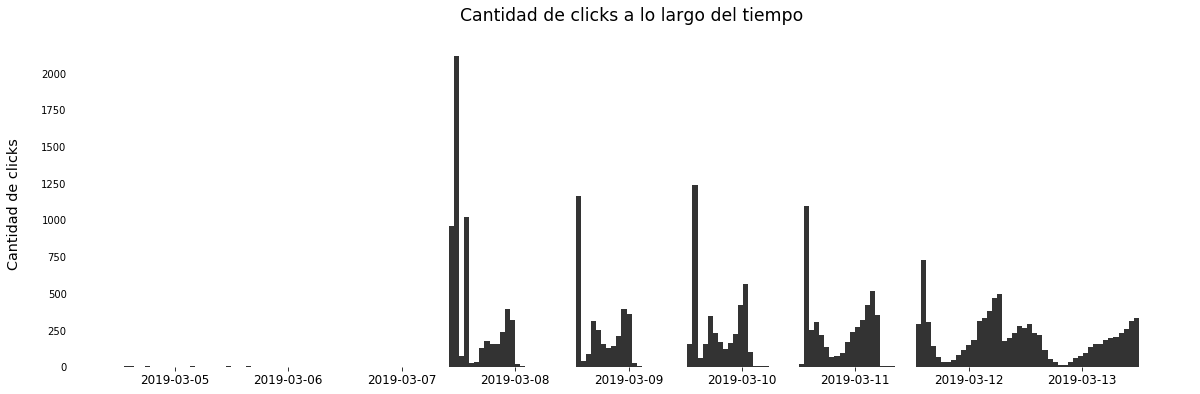

In [9]:
plt.figure(figsize=(20, 6))
plt.hist(clicks['created'], bins = 200, color = '#000000', alpha = 0.8)

plt.tick_params(top = False, bottom = True, left = False, right = False, labelleft = True, labelbottom = True)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.xticks(ticks = [pd.to_datetime('2019-03-05 12:00:00'), pd.to_datetime('2019-03-06 12:00:00'), pd.to_datetime('2019-03-07 12:00:00'), 
                    pd.to_datetime('2019-03-08 12:00:00'), pd.to_datetime('2019-03-09 12:00:00'), pd.to_datetime('2019-03-10 12:00:00'),
                   pd.to_datetime('2019-03-11 12:00:00'), pd.to_datetime('2019-03-12 12:00:00'), pd.to_datetime('2019-03-13 12:00:00')],
           labels = ['2019-03-05', '2019-03-06', '2019-03-07', '2019-03-08','2019-03-09', '2019-03-10', '2019-03-11', '2019-03-12', '2019-03-13'], 
           fontsize = 'large')
plt.ylabel('Cantidad de clicks', labelpad = 20, fontsize = 'x-large')
plt.title('Cantidad de clicks a lo largo del tiempo', fontsize = 'xx-large', pad = 20)


plt.show()

### Analizamos la cantidad de eventos por día

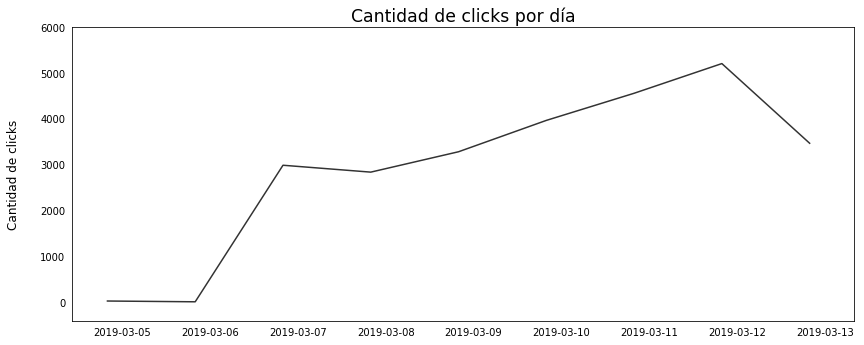

In [10]:
plt.figure(figsize=(14, 6))
clicks['just_date'].value_counts().plot(color = '#000000', alpha = 0.8)

plt.xticks(rotation = 0, ticks = [pd.to_datetime('2019-03-05 12:00:00'), pd.to_datetime('2019-03-06 12:00:00'), pd.to_datetime('2019-03-07 12:00:00'), 
                                  pd.to_datetime('2019-03-08 12:00:00'), pd.to_datetime('2019-03-09 12:00:00'), pd.to_datetime('2019-03-10 12:00:00'),
                   pd.to_datetime('2019-03-11 12:00:00'), pd.to_datetime('2019-03-12 12:00:00'), pd.to_datetime('2019-03-13 12:00:00')],
           labels = ['2019-03-05', '2019-03-06', '2019-03-07', '2019-03-08','2019-03-09', '2019-03-10', '2019-03-11', '2019-03-12', '2019-03-13'], 
           fontsize = 'medium')
plt.tick_params(top = False, bottom = False, left = False, right = False, labelleft = True, labelbottom = True)
plt.ylabel('Cantidad de clicks', labelpad = 20, fontsize = 'large')
plt.title('Cantidad de clicks por día', fontsize = 'xx-large')
plt.ylim(-400, 6000)
plt.show();

### Analizamos la cantidad de eventos por hora

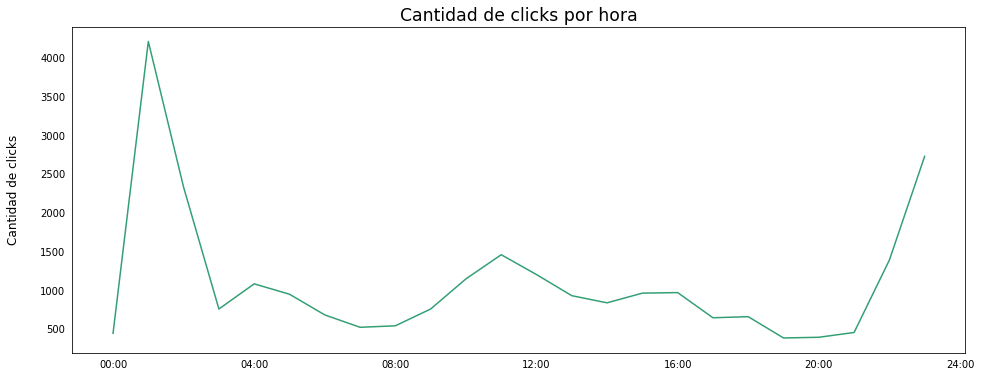

In [11]:
fig = plt.figure(figsize=(16, 6))
clicks['created'].groupby(clicks['created'].dt.hour).count().plot(kind = 'line', color = '#008751', alpha = 0.8)

plt.xticks(rotation = 0, ticks = [0, 4, 8, 12, 16, 20, 24], labels = ['00:00', '04:00', '08:00', '12:00', '16:00', '20:00', '24:00'], fontsize = 'medium')
plt.tick_params(top = False, bottom = False, left = False, right = False, labelleft = True, labelbottom = True)
plt.ylabel('Cantidad de clicks', labelpad = 20, fontsize = 'large')
plt.title('Cantidad de clicks por hora', fontsize = 'xx-large')
plt.xlabel('')
plt.show();

### Analizamos la distribución de los advertiser ID

In [35]:
clicks.advertiser_id.value_counts()

3    26263
0       70
2       12
7        2
1        2
8        1
5        1
Name: advertiser_id, dtype: int64

### Y establecemos su porcentaje sobre el total

In [38]:
#Porcentaje del mayor advertiser_id
biggest_advertiser_id = clicks.advertiser_id.value_counts().values.sum()/clicks.advertiser_id.value_counts().count() *100 
biggest_advertiser_id_porcentage = clicks.advertiser_id.value_counts().max()/clicks.advertiser_id.value_counts().values.sum()*100
biggest_advertiser_id_porcentage


99.66604682934233

In [49]:
### Evidenciamos la concentración homogenea de casi la totalidad de los avisos en un único

Text(0.5, 1.0, 'Cantidad de eventos para cada tipo de anunciante')

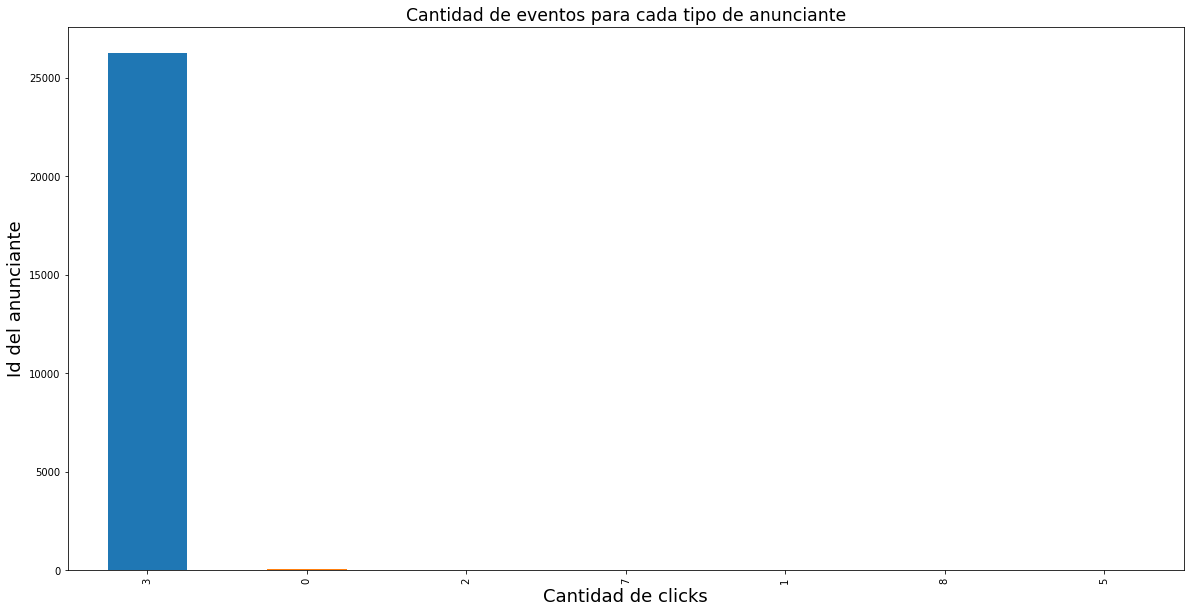

In [14]:
advertiser_id = clicks.advertiser_id.value_counts()
advertiser_id_plot = advertiser_id.plot.bar(figsize=(20,10))
advertiser_id_plot.set_xlabel('Cantidad de clicks', fontsize = 18)
advertiser_id_plot.set_ylabel('Id del anunciante', fontsize = 18)
advertiser_id_plot.set_title('Cantidad de eventos para cada tipo de anunciante', fontsize = 'xx-large')

In [15]:
clicks.advertiser_id.value_counts().index

Int64Index([3, 0, 2, 7, 1, 8, 5], dtype='int64')

### Indagamos en el Source Id

In [17]:
clicks.source_id.value_counts()    

0     17009
1      4298
6      3371
5      1628
2        27
3         9
10        3
7         2
4         2
9         1
8         1
Name: source_id, dtype: int64

### Establecemos su distribución

Text(0.5, 1.0, 'Cantidad de eventos para cada fuente de la que se originó el click')

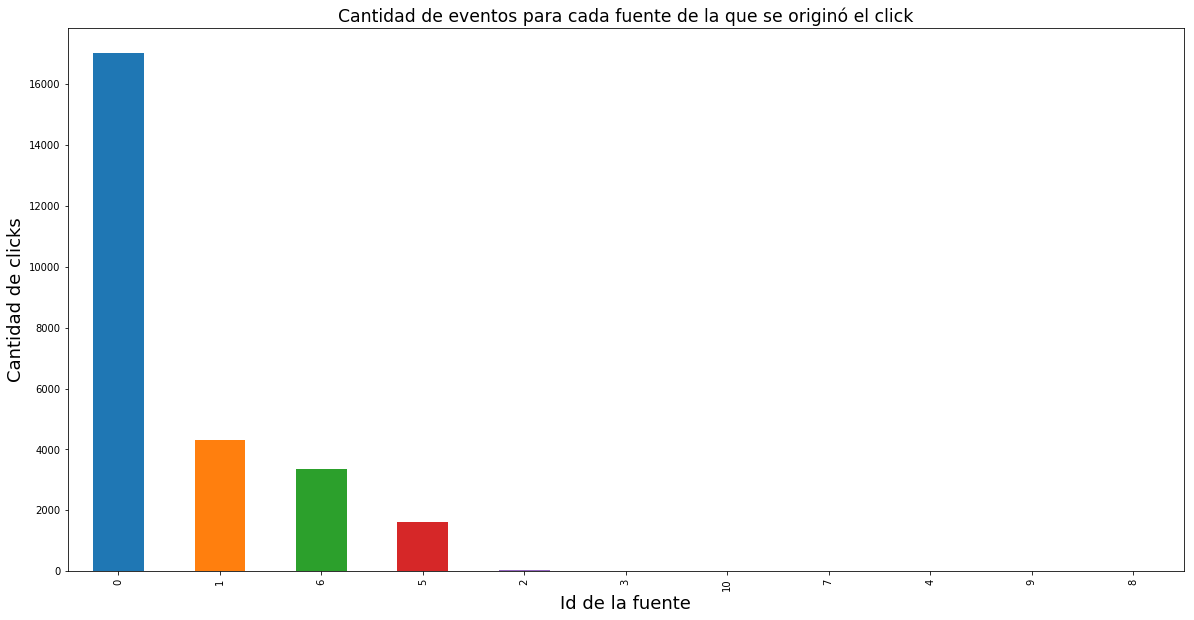

In [19]:
source_id = clicks.source_id.value_counts()
source_id_plot = source_id.plot.bar(figsize=(20,10))
source_id_plot.set_xlabel('Id de la fuente', fontsize = 18)
source_id_plot.set_ylabel('Cantidad de clicks', fontsize = 18)
source_id_plot.set_title('Cantidad de eventos para cada fuente de la que se originó el click', fontsize = 'xx-large')

In [20]:
most_frequent_source_id = clicks['source_id'].value_counts().sort_values(ascending = False).head(10)
most_frequent_source_id

0     17009
1      4298
6      3371
5      1628
2        27
3         9
10        3
4         2
7         2
8         1
Name: source_id, dtype: int64

In [21]:
#fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize = (24, 12), sharey = True)
#plt.subplots_adjust(hspace = 0.4)

#colors = sns.color_palette('Spectral', 10)
#_ids = sorted(most_frequent_source_id)

#for source_id, ax, c in zip(_ids, [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10], colors):
 #   ax.set_title('Fuente: {}'.format(source_id), fontsize = 'large')
    
  #  this_source = clicks[clicks['source_id'] == source_id]
   # ax.hist(this_source['just_date'], bins=len(set(this_source['just_date'])), color = c, edgecolor = 'black')
#    ax.tick_params(axis = 'x', labelrotation = 45)
    
#ax1.set_ylabel('Cantidad de fuentes', fontsize = 'large');
#ax6.set_ylabel('Cantidad de fuentes', fontsize = 'large');
#fig.suptitle('Distribución de los distintos tipos de fuentes a lo largo del tiempo', fontsize = 'xx-large');

### Exploramos el rango temporal del tiempo de los clicks

In [22]:
clicks.timeToClick.min()

0.017

In [23]:
clicks.timeToClick.max()

17616.188000000002

In [24]:
clicks.timeToClick.value_counts()

0.261      11
0.267       9
0.210       9
0.338       9
2.221       8
0.232       8
2.043       8
0.252       8
2.041       8
0.194       7
0.340       7
2.252       7
4.179       7
1.917       7
1.676       7
2.892       7
0.187       7
0.251       7
1.717       7
0.226       6
0.352       6
1.792       6
0.384       6
0.308       6
0.271       6
0.219       6
0.482       6
1.664       6
0.272       6
1.839       6
           ..
147.252     1
482.467     1
6.415       1
649.753     1
51.070      1
11.795      1
59.467      1
36.624      1
15.268      1
13.609      1
2.256       1
183.282     1
1.975       1
13.924      1
437.556     1
37.382      1
267.876     1
13.370      1
221.478     1
37.270      1
77.196      1
55.258      1
375.753     1
62.718      1
5.702       1
900.099     1
443.978     1
330.022     1
12.388      1
11.000      1
Name: timeToClick, Length: 17294, dtype: int64

(array([6090., 2415., 1081.,  675.]),
 array([ 0, 10, 20, 30, 40]),
 <a list of 4 Patch objects>)

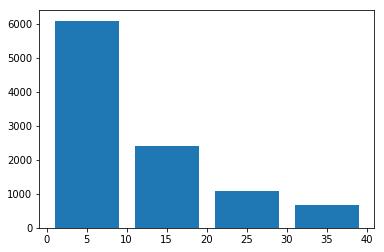

In [174]:
timeToClick_bins = [0, 10, 20, 30, 40]
plt.hist(clicks.timeToClick.value_counts().index.tolist(), timeToClick_bins, histtype='bar', rwidth=0.8)

In [143]:
clicks.timeToClick.value_counts().sort_values(ascending = False).head(10)

0.261    11
0.267     9
0.210     9
0.338     9
2.221     8
0.232     8
2.043     8
0.252     8
2.041     8
1.917     7
Name: timeToClick, dtype: int64

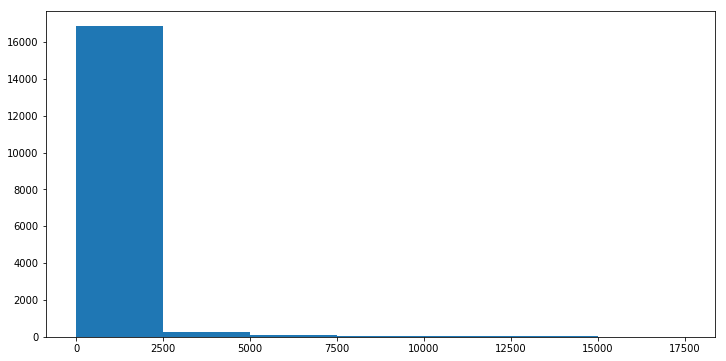

In [48]:
plt.figure(figsize=(12, 6))
timeToClick_bins =  [0, 2500, 5000, 7500, 10000, 12500, 15000, 17500]
plt.hist(clicks.timeToClick.value_counts().index.tolist(), timeToClick_bins)
plt.show()